In [2]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
X = dataset[:, 0: 10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [9]:
Y = dataset[:, 10]
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [16]:
from sklearn.model_selection import train_test_split

X_train,  X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test,Y_val_and_test, test_size=0.5 )

X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((1022, 10), (219, 10), (219, 10), (1022,), (219,), (219,))

In [19]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential([
    Dense(32, activation = 'relu', input_shape = (10, )),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'sgd',
loss= 'binary_crossentropy',
metrics=['accuracy'])


In [20]:
hist = model.fit(X_train, Y_train, batch_size= 32, epochs = 100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.5147 - val_loss: 0.7017 - val_accuracy: 0.4110
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5147 - val_loss: 0.6901 - val_accuracy: 0.4110
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5431 - val_loss: 0.6809 - val_accuracy: 0.5982
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.6849 - val_loss: 0.6736 - val_accuracy: 0.6986
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7162 - val_loss: 0.6670 - val_accuracy: 0.7260
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7329 - val_loss: 0.6607 - val_accuracy: 0.7671
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7495 - val_loss: 0.6554 - val_accuracy: 0.7626
Epoch 8/100


In [38]:
model.evaluate(X_test, Y_test)[1]
hist.history['accuracy']

7/7 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8904


[0.514677107334137,
 0.514677107334137,
 0.5430528521537781,
 0.6849315166473389,
 0.7162426710128784,
 0.732876718044281,
 0.7495107650756836,
 0.7514677047729492,
 0.7446184158325195,
 0.7387475371360779,
 0.7485322952270508,
 0.7553815841674805,
 0.7592955231666565,
 0.7504892349243164,
 0.7651663422584534,
 0.7651663422584534,
 0.7651663422584534,
 0.7720156311988831,
 0.7681017518043518,
 0.7778865098953247,
 0.7769080400466919,
 0.7788649797439575,
 0.7769080400466919,
 0.7847357988357544,
 0.7808219194412231,
 0.7837573289871216,
 0.7827788591384888,
 0.7896282076835632,
 0.7896282076835632,
 0.7925636172294617,
 0.801369845867157,
 0.7964774966239929,
 0.8023483157157898,
 0.8101761341094971,
 0.8121330738067627,
 0.8170254230499268,
 0.816046953201294,
 0.8199608325958252,
 0.8219178318977356,
 0.8326810002326965,
 0.8326810002326965,
 0.8326810002326965,
 0.8317025303840637,
 0.8346379399299622,
 0.8365949392318726,
 0.8414872884750366,
 0.8434442281723022,
 0.845401167869567

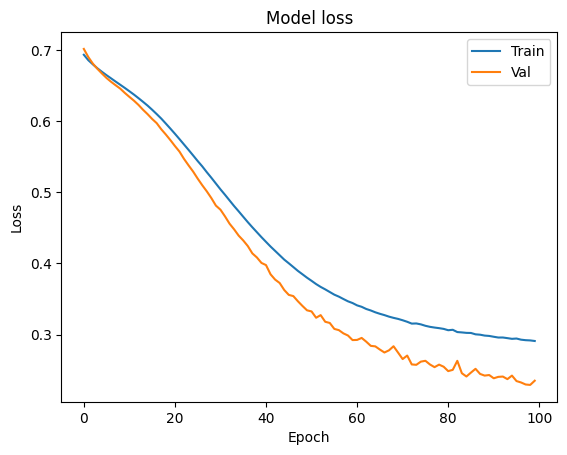

In [35]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

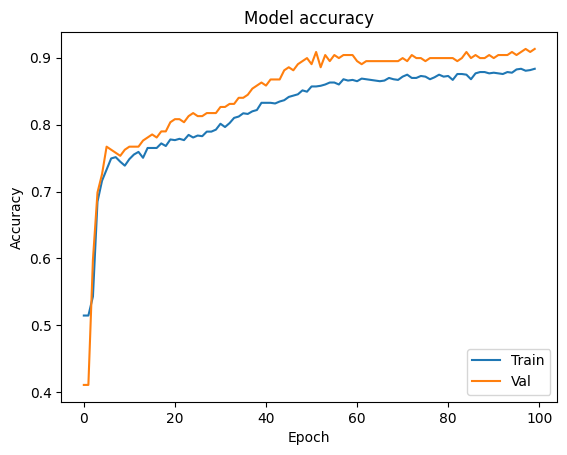

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [124]:
#  Adding Regulation


model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000 , activation='relu'),
    Dense(1, activation='sigmoid')
])


model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 44ms/step - loss: 0.5565 - accuracy: 0.7221 - val_loss: 0.4088 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3851 - accuracy: 0.8386 - val_loss: 0.2414 - val_accuracy: 0.9178
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3365 - accuracy: 0.8532 - val_loss: 0.2172 - val_accuracy: 0.9224
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3139 - accuracy: 0.8708 - val_loss: 0.2106 - val_accuracy: 0.9269
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2765 - accuracy: 0.8836 - val_loss: 0.1806 - val_accuracy: 0.9406
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2875 - accuracy: 0.8836 - val_loss: 0.2020 - val_accuracy: 0.9224
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3283 - accuracy: 0.8767 - val_loss: 0.2166 - val_accuracy: 0.9224
Epoch 

In [165]:
import numpy as np
x_test = np.array([[10, 0, 0, 50, 100, 6, 11, 12, 13, 14]])
y_pred = model_2.predict(X_test)
print(y_pred)

7/7 [==============================] - 0s 5ms/step
[[8.72074902e-01]
 [2.22355757e-05]
 [9.99964416e-01]
 [1.87541882e-04]
 [9.91345167e-01]
 [9.99286890e-01]
 [6.35469274e-15]
 [2.55570200e-07]
 [9.99999404e-01]
 [1.09611385e-04]
 [4.81683742e-07]
 [9.94834244e-01]
 [3.10068160e-12]
 [4.84221475e-03]
 [9.99807537e-01]
 [2.18747255e-06]
 [2.43291674e-06]
 [6.34063781e-06]
 [4.82160121e-01]
 [8.24725688e-01]
 [5.01405122e-03]
 [2.07705369e-07]
 [9.61950779e-01]
 [5.17442644e-01]
 [9.67844605e-01]
 [9.50397670e-01]
 [5.12279272e-01]
 [9.99997795e-01]
 [9.99985576e-01]
 [9.92068410e-01]
 [7.44356665e-09]
 [3.38006943e-01]
 [9.88192201e-01]
 [9.95601535e-01]
 [4.06039894e-01]
 [9.99874353e-01]
 [9.90829170e-01]
 [1.77751277e-02]
 [8.50082934e-01]
 [9.79851723e-01]
 [9.69790995e-01]
 [5.55347106e-06]
 [9.96338546e-01]
 [1.67959765e-01]
 [5.64773418e-02]
 [9.99847174e-01]
 [1.56486332e-01]
 [9.80023324e-01]
 [5.92285320e-02]
 [1.28644620e-04]
 [4.16626390e-05]
 [5.86208701e-01]
 [3.63061554e

In [168]:
from sklearn.metrics import confusion_matrix

# create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

# create the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# print the confusion matrix
print(conf_matrix)


ValueError: Classification metrics can't handle a mix of binary and continuous targets